<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/diplomado/1_CIFAR10_ALUMNOS_DIPLOMADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

## ORGANIZAMOS NUESTROS CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
from keras.utils import to_categorical

categorias = [1, 2, 3, 10]
to_categorical(categorias)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Usamos matplotlib para mostrar algunas imágenes de CIFAR10

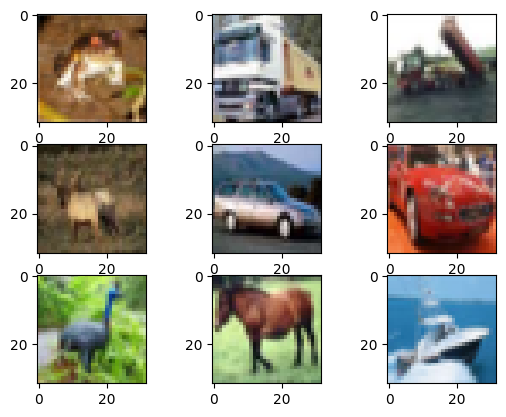

In [4]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i) # El 330 indica la cantidad de rows y columnas
    plt.imshow(x_train[i])

plt.show()

Usamos el método to_categoriacal para asignar a cada imagen una categoría.

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(y_train[30])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


SE BARAJEAN LAS IMÁGENES PARA EL ENTRENAMIENTO Y VALIDACIÓN

In [7]:
import numpy as np

np.random.seed(42)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

# DEFINIMOS LA ARQUITECTURA CNN

In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Segunda capa
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Aplanado y calificacion
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Definimos los hiperparámetros

In [17]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train,
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.2196 - loss: 15.7767 - val_acc: 0.3743 - val_loss: 2.0132
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.4659 - loss: 1.5927 - val_acc: 0.5174 - val_loss: 1.3997
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.5971 - loss: 1.1630 - val_acc: 0.5747 - val_loss: 1.2604
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6820 - loss: 0.9246 - val_acc: 0.6006 - val_loss: 1.2142
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7473 - loss: 0.7492 - val_acc: 0.6090 - val_loss: 1.2010
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.8003 - loss: 0.6009 - val_acc: 0.5891 - val_loss: 1.3114
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8463 - loss: 0.4751 - val_acc: 0.6235 - val_loss: 1.2415
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8827 - loss: 0.3717 - val_acc: 0.6146 - val_loss: 1.3331
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5m

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,244,374 (16.19 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,122,188 (8.10 MB)

# Ejemplo para graficar la perdida y exactitud del entrenamiento y el conjunto de validación

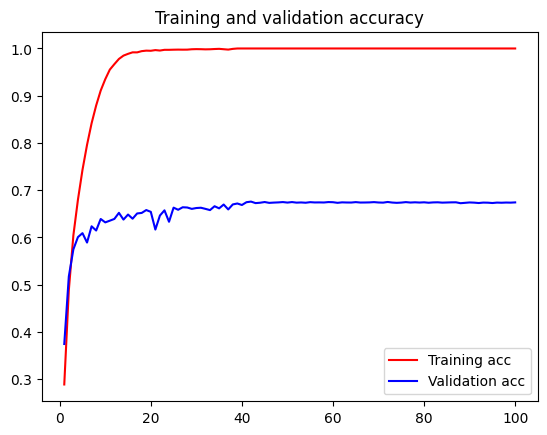

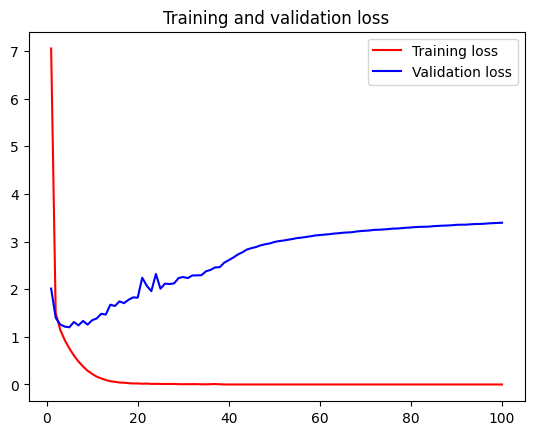

In [18]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# UNA SEGUNDA PROPUESTA DE ARQUITECTURA considerando el Dropout

In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(10, activation='softmax'))

Se definen los Hiperparámetros

In [21]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [22]:
train_log2 = model2.fit(x_train, y_train,
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - acc: 0.1120 - loss: 26.1526 - val_acc: 0.0931 - val_loss: 2.3025
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.1033 - loss: 2.3140 - val_acc: 0.0937 - val_loss: 2.3023
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.1027 - loss: 2.3101 - val_acc: 0.0952 - val_loss: 2.3016
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.1095 - loss: 2.2989 - val_acc: 0.1576 - val_loss: 2.2349
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.1452 - loss: 2.2536 - val_acc: 0.1877 - val_loss: 2.1451
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.1738 - loss: 2.1633 - val_acc: 0.2800 - val_loss: 1.9000
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.2420 - loss: 1.9945 - val_acc: 0.3477 - val_loss: 1.7779
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.2934 - loss: 1.8700 - val_acc: 0.4045 - val_loss: 1.6589
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6m

Se grafican los resultados

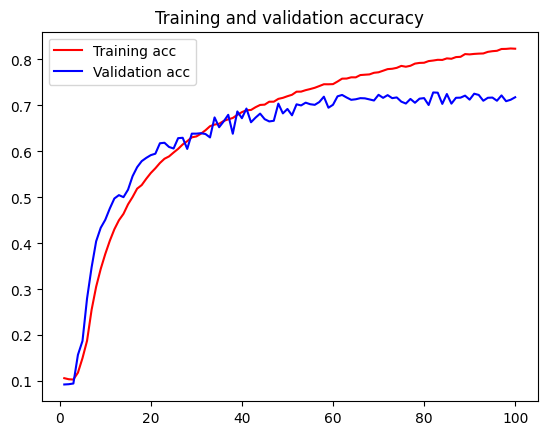

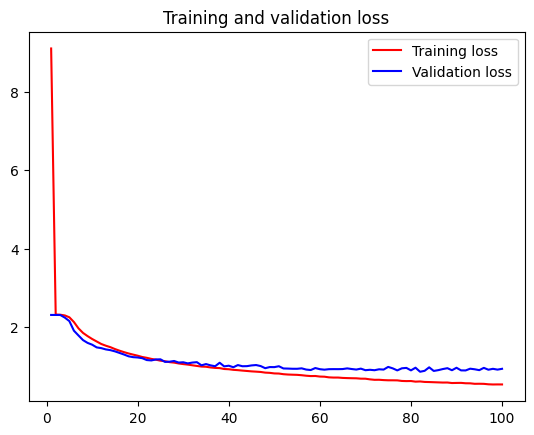

In [23]:
import matplotlib.pyplot as plt

acc = train_log2.history['acc']
val_acc = train_log2.history['val_acc']
loss = train_log2.history['loss']
val_loss = train_log2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#EJERCICIO, PROPONGA SU PROPIA ARQUITECTURA Y GRAFIQUE SUS RESULTADOS.

In [24]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')

In [27]:
train_log3 = model3.fit(x_train, y_train,
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val),
                        callbacks=[early_stop])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - acc: 0.1386 - loss: 6.1149 - val_acc: 0.3328 - val_loss: 1.9668
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.2880 - loss: 1.9190 - val_acc: 0.4128 - val_loss: 1.6827
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - acc: 0.3700 - loss: 1.7106 - val_acc: 0.4491 - val_loss: 1.5725
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.4190 - loss: 1.5791 - val_acc: 0.4646 - val_loss: 1.4963
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.4537 - loss: 1.4961 - val_acc: 0.5181 - val_loss: 1.3957
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.4781 - loss: 1.4329 - val_acc: 0.5349 - val_loss: 1.3338
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.4988 - loss: 1.3845 - val_acc: 0.5389 - val_loss: 1.3006
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - acc: 0.5209 - loss: 1.3293 - val_acc: 0.5571 - val_loss: 1.2531
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━

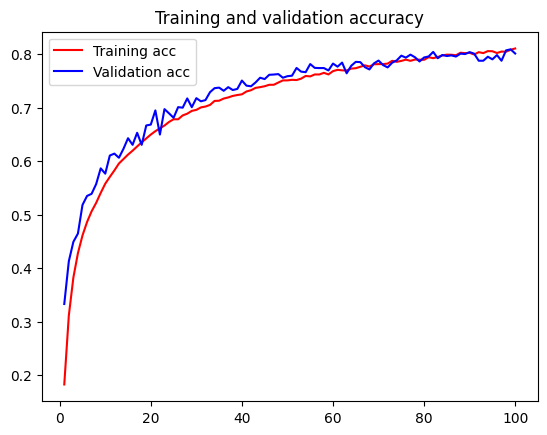

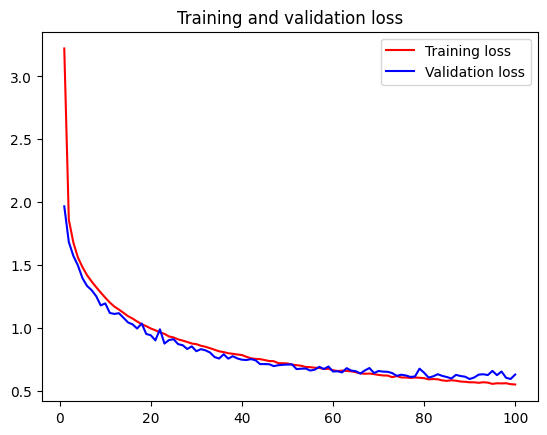

In [28]:
import matplotlib.pyplot as plt

acc = train_log3.history['acc']
val_acc = train_log3.history['val_acc']
loss = train_log3.history['loss']
val_loss = train_log3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluacion

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - acc: 0.6663 - loss: 3.4188

Test accuracy: 0.6662999987602234


In [30]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 3ms/step - acc: 0.7154 - loss: 0.9345

Test accuracy: 0.715399980545044


In [31]:
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - acc: 0.8011 - loss: 0.6095

Test accuracy: 0.8011000156402588


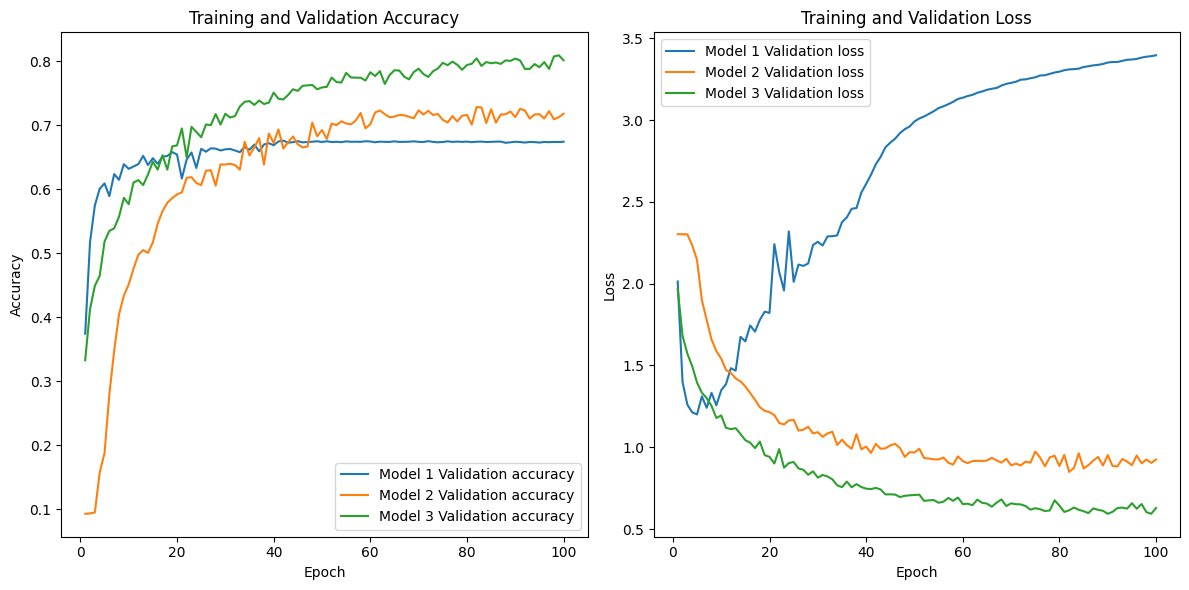

In [37]:
import matplotlib.pyplot as plt

def plot_accuracy(train_log, label_prefix):
    acc = train_log.history['acc']
    val_acc = train_log.history['val_acc']
    epochs = range(1, len(acc) + 1)

    # plt.plot(epochs, acc, label=f'{label_prefix} Training accuracy')
    plt.plot(epochs, val_acc, label=f'{label_prefix} Validation accuracy')

def plot_loss(train_log, label_prefix):
    loss = train_log.history['loss']
    val_loss = train_log.history['val_loss']
    epochs = range(1, len(loss) + 1)

    # plt.plot(epochs, loss, label=f'{label_prefix} Training loss')
    plt.plot(epochs, val_loss, label=f'{label_prefix} Validation loss')

# Crear gráficos
plt.figure(figsize=(12, 6))

# Precisión (Accuracy)
plt.subplot(1, 2, 1)
plot_accuracy(train_log, 'Model 1')
plot_accuracy(train_log2, 'Model 2')
plot_accuracy(train_log3, 'Model 3')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida (Loss)
plt.subplot(1, 2, 2)
plot_loss(train_log, 'Model 1')
plot_loss(train_log2, 'Model 2')
plot_loss(train_log3, 'Model 3')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
